## Linear Regression Project

### Data Loading and Preprocessing

Load the dataset and split it into training and validation sets.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data1.txt'
data = pd.read_csv(file_path, header=None, names=['Feature1', 'Feature2', 'Target'])

# Split the dataset (70% training, 30% validation)
train_set, val_set = train_test_split(data, test_size=0.3, random_state=42)

# Extract features and target
X_train = train_set[['Feature1', 'Feature2']]
y_train = train_set['Target']
X_val = val_set[['Feature1', 'Feature2']]
y_val = val_set['Target']

# Add a column of ones to X_train for intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    

### Linear Regression Using Normal Equation

Implement the normal equation to compute the parameters of the linear regression model.

In [2]:

# Normal Equation Function
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Compute parameters using Normal Equation
theta = normal_equation(X_train, y_train)
theta
    

array([69599.05822335,   131.12253589, -2825.22573808])

### Linear Regression Using Gradient Descent

Implement gradient descent to optimize the model parameters.

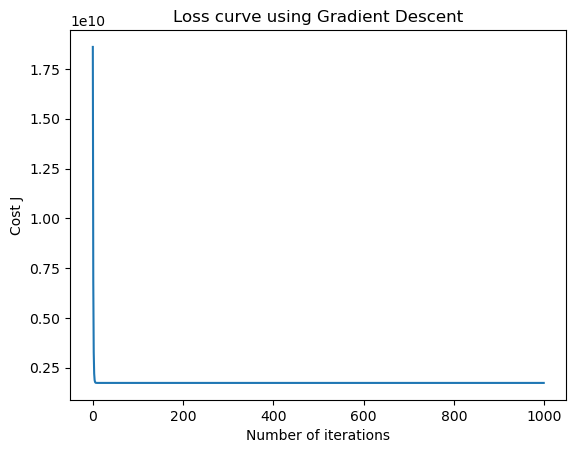

array([  0.89192085, 157.50452355,   1.6561872 ])

In [3]:

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []  # To store the cost in each iteration

    for i in range(num_iters):
        predictions = X @ theta
        errors = predictions - y
        delta = (1/m) * (X.T @ errors)
        theta -= alpha * delta
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    square_err = (predictions - y) ** 2

    return 1/(2*m) * np.sum(square_err)

# Initialize theta, learning rate and number of iterations for gradient descent
theta_gd = np.zeros(3)
alpha = 0.0000001
num_iters = 1000

# Compute theta using gradient descent
theta_gd, J_history = gradient_descent(X_train, y_train, theta_gd, alpha, num_iters)

# Plotting the loss curve
plt.figure()
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Loss curve using Gradient Descent')
plt.show()
theta_gd
    

### Visualization

Visualize the loss curve during training and the regression line on the validation set.

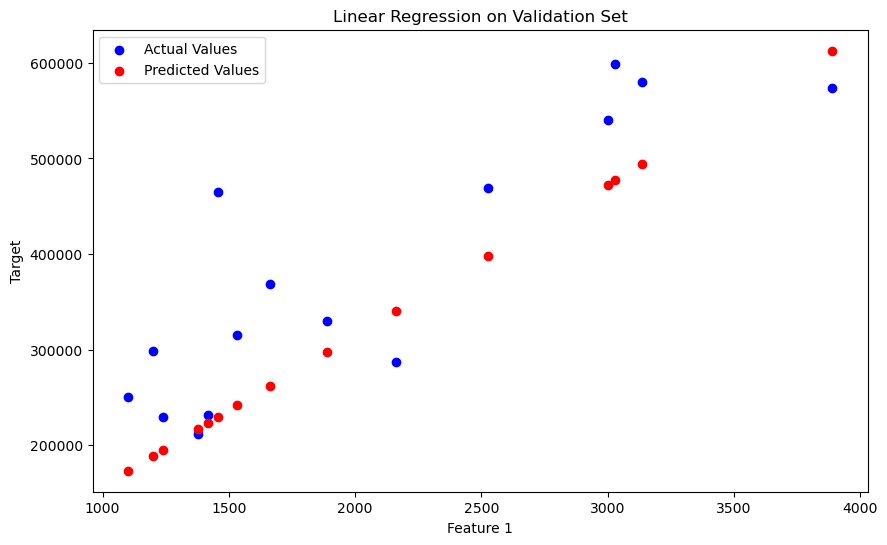

In [4]:

# Add a column of ones to X_val for the intercept term
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# Predictions on the validation set
predictions_val = X_val @ theta_gd

# Plotting the regression line on the validation set
plt.figure(figsize=(10,6))
plt.scatter(X_val[:,1], y_val, color='blue', label='Actual Values')
plt.scatter(X_val[:,1], predictions_val, color='red', label='Predicted Values')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression on Validation Set')
plt.legend()
plt.show()
    